In [1]:
%load_ext autoreload
%autoreload 2

from https://www.microscopyu.com/microscopy-basics/properties-of-microscope-objectives 

100x oil: NA = 1.4 

60x air: NA = 0.95 

40x air: NA = 0.95 

20x air: NA = 0.75 

10x air: NA = 0.45 

4x air: NA = 0.2 

2x air: NA = 0.1 

In [2]:
# import sys
# sys.path.insert(1, '/home/georgeos/Documents/GitHub/SyMBac/') # Not needed if you installed SyMBac using pip

from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\robho\OneDrive\Desktop\Uni Work\Year 4\project2\SyMBac\cell_simulation.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
for image in get_sample_images():
    print(get_sample_images()[image].shape)
    print(image)

(256, 46)
E. coli 100x
(256, 46)
E. coli 100x stationary
(256, 32)
E. coli DeLTA
(256, 46)
E. coli 100x fluorescence


In [9]:
from SyMBac.misc import interpolate
from scipy.ndimage import gaussian_filter
from SyMBac.drawing import make_images_same_shape

# 100x

In [5]:
pmcs = np.array([1,10/6,10/4,10/3.5,10/3,10/2.5,10/2,10/1])*0.0655

In [6]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = pmcs[0],
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3,
    objective=100
)

In [89]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [90]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

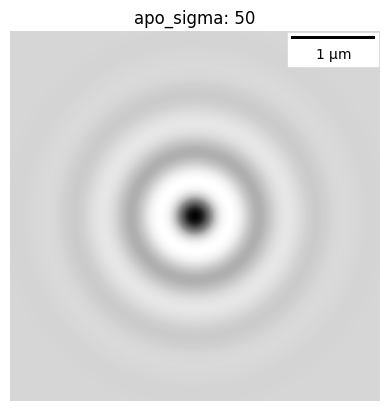

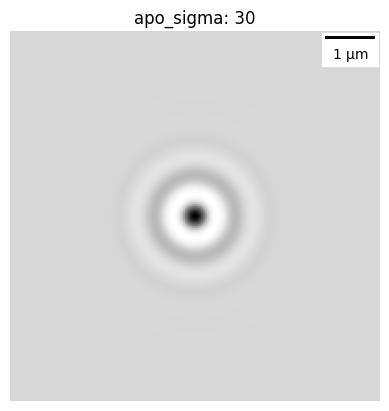

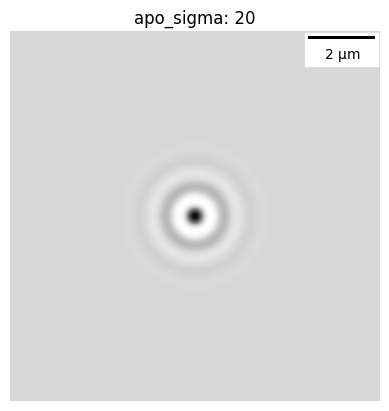

In [14]:
# A 2D phase contrast kernel
kern_list = []
for radius, sig, pmc, na, n, condenser in [[100,50,pmcs[0],1.45,1.5,"Ph3"],[100,30,pmcs[1],0.95,1,"Ph2"],[100,20,pmcs[2],0.85,1,"Ph1"]]: #,[100,10,pmcs[-2],0.75,1,"Ph3"]]:
    my_kernel = PSF_generator(
        radius = radius,
        wavelength = 0.6,
        NA = na,
        n = n,
        resize_amount = 3,
        pix_mic_conv = pmc,
        apo_sigma = sig,
        mode="phase contrast",
        condenser = condenser)
    kern_list.append(my_kernel)
    my_kernel.calculate_PSF()
    my_kernel.plot_PSF()

In [15]:
real_image60 = interpolate(gaussian_filter(real_image,sigma=1.5),(int(real_image.shape[0]*6/10),int(real_image.shape[1]*6/10)))
real_image40 = interpolate(gaussian_filter(real_image,sigma=2),(int(real_image.shape[0]*4/10),int(real_image.shape[1]*4/10)))
real_image_list = [real_image, real_image60, real_image40] #, real_image20]

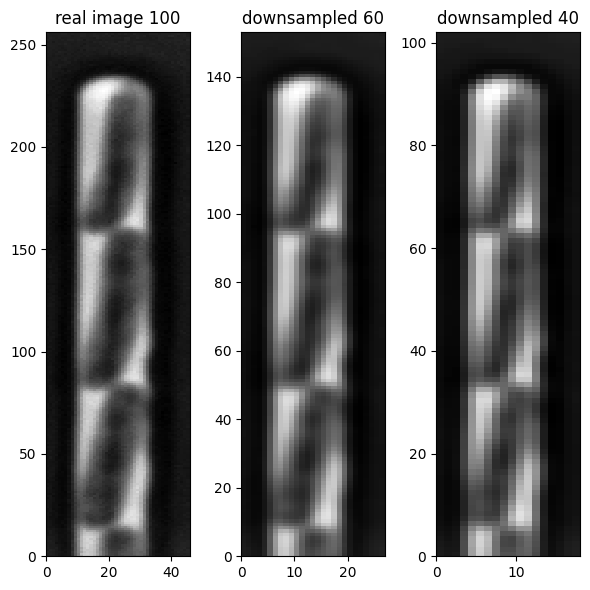

In [16]:
fig, axs = plt.subplots(1,3,figsize = (6,6))
axs[0].pcolor(real_image[::-1],cmap="Greys_r")
axs[0].set_title("real image 100")
axs[1].pcolor(real_image60[::-1],cmap="Greys_r")
axs[1].set_title("downsampled 60")
axs[2].pcolor(real_image40[::-1],cmap="Greys_r")
axs[2].set_title("downsampled 40")
# axs[3].pcolor(real_image20[::-1],cmap="Greys_r")
# axs[3].set_title("downsampled 20")
fig.tight_layout()
plt.show()

In [91]:
my_renderer = Renderer(simulation=my_simulation, 
                       PSF_list = kern_list, 
                       real_image_list = real_image_list)

In [92]:
ml = np.array(pd.read_csv("media_label.csv",header=None))
cl = np.array(pd.read_csv("cell_label.csv",header=None))
dl = np.array(pd.read_csv("device_label.csv",header=None))

In [93]:
my_renderer.select_intensity_napari(ml,cl,dl)

In [94]:
1/10 + 2/10 == 3/10

False

In [95]:
# pd.DataFrame(my_renderer.media_label.data).to_csv("media_label.csv",header=0,index=False)
# pd.DataFrame(my_renderer.cell_label.data).to_csv("cell_label.csv",header=0,index=False)
# pd.DataFrame(my_renderer.device_label.data).to_csv("device_label.csv",header=0,index=False)

In [96]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [97]:
my_renderer.save_params()

In [100]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [101]:
my_renderer.save_params()

In [102]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [103]:
my_renderer.save_params()

In [110]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 3000, save_dir="superres/second_trial/SR_training/train", in_series=False)

Folder already exists: superres/second_trial/SR_training/train
Folder already exists: superres/second_trial/SR_training/train


Sample generation: 100%|██████████| 3000/3000 [48:44<00:00,  1.03it/s]


# 10x

In [ ]:
real_image20 = np.zeros((np.array(real_image.shape)//[256/100,46/30]).astype(int))
a,b = real_image20.shape
for i in range(a):
    for j in range(b):
        real_image20[i,j] = real_image[int(2.56*i),int(46/30*j)]

In [ ]:
plt.pcolor(real_image20, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [63]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.65,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [64]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [65]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

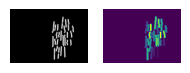

In [66]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

In [59]:
some = [[],[],[]]

In [60]:
some[1].append(5)

In [61]:
some

[[], [5], []]

In [62]:
some.append([])

In [63]:
some

[[], [5], [], []]

In [13]:
from interpolate import linear_interpolate
import numpy as np
import matplotlib.pyplot as plt

In [3]:
array = np.random.randn(102,18)

In [4]:
%%timeit
out = linear_interpolate(array,(256,46),method='linear')

597 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%%timeit
out = linear_interpolate(array,(256,46),method='cubic')

1.55 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
array = np.random.randn(256,46)

In [7]:
%%timeit
linear_interpolate(array,(256,46),method='linear')

3.66 µs ± 54.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
%%timeit
linear_interpolate(array,(256,46),method='cubic')

3.75 µs ± 97.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
some = ["aaa","bbb","bcc"]
"*cc" in some

False

In [27]:
arr = np.ones([4,1,256,46])
arr[1] *= 2
arr[2] *= 3
arr[3] *= 4

In [31]:
arr2 = arr.reshape([46*4,256]).T

In [32]:
arr2.shape

(256, 184)

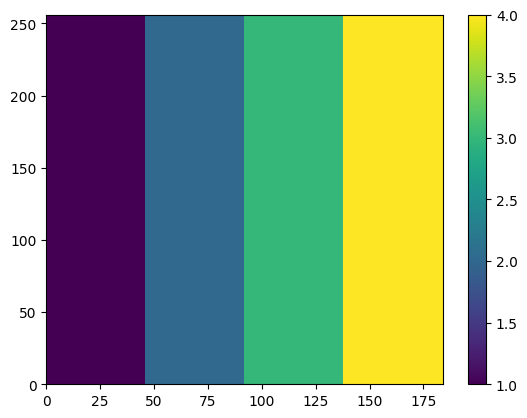

In [33]:
plt.pcolor(arr2)
plt.colorbar()
plt.show()

In [25]:
arr3 = np.hstack((arr[0,0],arr[1,0],arr[2,0],arr[3,0]))

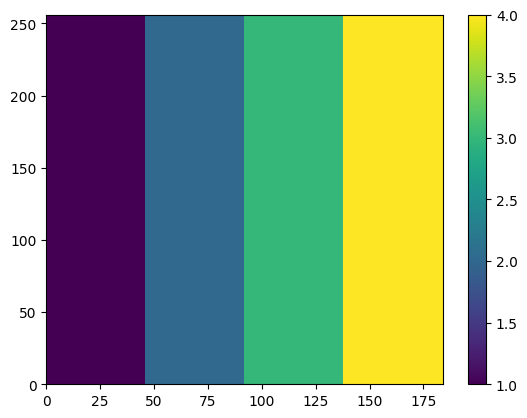

In [26]:
plt.pcolor(arr3)
plt.colorbar()
plt.show()

In [35]:
np.all(arr2==arr3)

True